Вы вольны выбирать любое количество слоёв, подбирать гиперпараметры, выбирать оптимизатор, функцию ошибки итд.
Можете разбивать на train-val-test исходя из того, как думаете, что будет лучше.

4 балла:
Модель должна работоспособна, воспроизводима, код должен быть читаемым;
Метрика качества accuracy должна быть не ниже 0.9;
Процесс схождения должен быть залогирован (хотя бы просто графиками в matplotlib, но желательно втч. и в Tensorboard/ClearML/...).

5 баллов:
Всё то же самое, что на 4 балла, но выполнены подзадания 1, 2 и 3, а метрика качества accuracy должна быть не ниже 0.95.

Подзадания:
1) Выведите кол-во обучаемых параметров сети;
2) Напишите несколько предложений выводов - что помогло в решении и повысило качество, что нет.
3) Посчитайте F1-score на тестовой подвыборке.
По желанию к выполнению, в разбалловке не учитывается:
3) Выведите confusion matrix для тестовой подвыборки.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:

dataset_path = 'dataset'

img_height, img_width = 150, 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 328420 images belonging to 2 classes.
Found 82104 images belonging to 2 classes.


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
) 

c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3983s 388ms/step - accuracy: 0.8268 - loss: 0.3905 - val_accuracy: 0.8829 - val_loss: 0.2851
Epoch 2/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3855s 376ms/step - accuracy: 0.8919 - loss: 0.2704 - val_accuracy: 0.8976 - val_loss: 0.2581
Epoch 3/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3832s 373ms/step - accuracy: 0.9047 - loss: 0.2436 - val_accuracy: 0.8979 - val_loss: 0.2589
Epoch 4/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 4100s 399ms/step - accuracy: 0.9115 - loss: 0.2253 - val_accuracy: 0.9109 - val_loss: 0.2270
Epoch 5/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3979s 388ms/step - accuracy: 0.9172 - loss: 0.2126 - val_accuracy: 0.9023 - val_loss: 0.2469
Epoch 6/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3926s 382ms/step - accuracy: 0.9227 - loss: 0.2000 - val_accuracy: 0.9095 - val_loss: 0.2343
Epoch 7/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 4264s 415ms/step - accuracy: 0.9271 - loss: 0.1890 - val_accuracy: 0.9094 - val_loss: 0.2388
Epoch 8/10
10264/10264 ━━━━━━━━━━━━━━━━━━

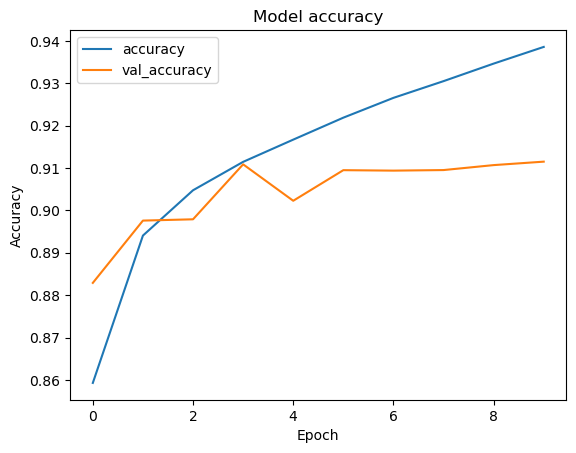

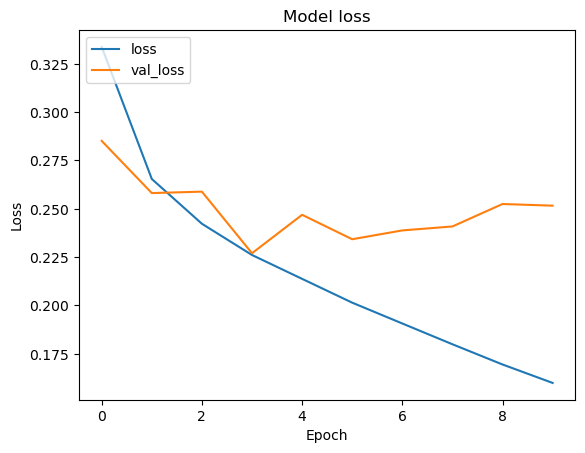

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

2566/2566 ━━━━━━━━━━━━━━━━━━━━ 285s 111ms/step - accuracy: 0.9101 - loss: 0.2548
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 284s 110ms/step
F1 Score: 0.47370459298272793


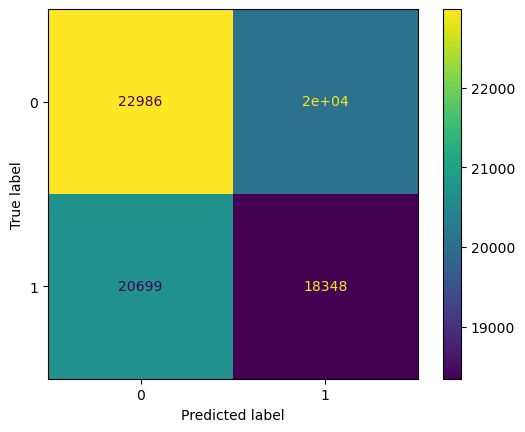

In [15]:
test_loss, test_accuracy = model.evaluate(validation_generator)


y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype(int)

f1 = f1_score(y_true, y_pred_classes)
print(f"F1 Score: {f1}")


cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

В результате метрика accuracy получилась равной 0.9101  
Метрика F1-score = 0.4737